In [1]:
import numpy as np
import os
from tensorflow.keras.applications import VGG19
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from tensorflow.keras.utils import to_categorical
import numpy as np


# Lendo e pre-processando as imagens

In [ ]:
path_test_NORMAL = '/content/drive/MyDrive/dados_pneumonia/test/NORMAL/'
path_test_PNEUMONIA = '/content/drive/MyDrive/dados_pneumonia/test/PNEUMONIA/'

# Lista de todas as imagens
list_img_normal = os.listdir(path_test_NORMAL)
list_img_pneumonia = os.listdir(path_test_PNEUMONIA)

x_data = []
y_data = []

# Lendo as imagens que tem normal
for img_name in list_img_normal:
    img_path = os.path.join(path_test_NORMAL, img_name)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    x_data.append(img_array)
    y_data.append(0)  # Rótulo 0 para NORMAL

# Lendo as imagens que tem pneumonia
for img_name in list_img_pneumonia:
    img_path = os.path.join(path_test_PNEUMONIA, img_name)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    x_data.append(img_array)
    y_data.append(1)  # Rótulo 1 para PNEUMONIA

x_data = np.array(x_data)
y_data = np.array(y_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


# Carregando o modelo

In [ ]:
num_classes = 2
#VGG19 pré-treinado
#VGG19 sem as camadas totalmente conectadas
base_model = VGG19(weights='imagenet', include_top=False)

#camadas totalmente conectadas para a nova tarefa de classificação
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

#Novo modelo combinando a base pré-treinada com as camadas personalizadas
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar as camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Tranformando os rótulos em codificação one-hot
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Treinando o modelo
model.fit(x_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(x_test, y_test_one_hot))

# Medindo o desempenho do modelo nos dados de teste
accuracy = model.evaluate(x_test, y_test_one_hot)[1]
print(f'Acurácia nos dados de teste: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 343ms/step


2023-12-07 22:58:08.214521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Saída da Primeira Camada de Convolução:
(1, 14, 14, 512)


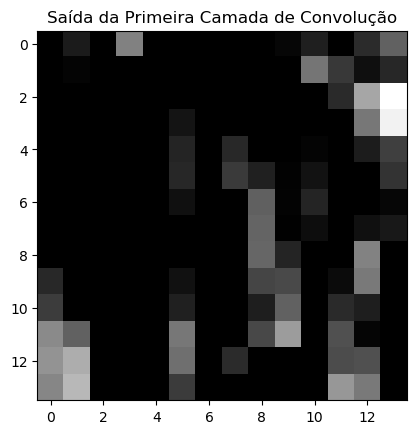

In [28]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np

# Carregar o modelo VGG19 pré-treinado
modelo_vgg19 = VGG19(weights='imagenet')

# Carregar uma imagem para teste (substitua 'caminho_da_imagem.jpg' pelo caminho da sua imagem)
caminho_da_imagem = '/Users/natorjunior/Desktop/DOUTORADO/deep/transferencia-de-aprendizado/img/test/NORMAL/IM-0001-0001.jpeg'
img = image.load_img(caminho_da_imagem, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Obter a saída da primeira camada de convolução
primeira_camada_conv = modelo_vgg19.layers[16]
modelo_extracao = tf.keras.Model(inputs=modelo_vgg19.input, outputs=primeira_camada_conv.output)
saida_primeira_camada = modelo_extracao.predict(img_array)

# Imprimir a saída
print("Saída da Primeira Camada de Convolução:")
print(saida_primeira_camada.shape)
# Exibir a saída como uma imagem
plt.imshow(saida_primeira_camada[0, :, :, 0], cmap='gray')
plt.title('Saída da Primeira Camada de Convolução')
plt.show()

In [14]:
import matplotlib.pyplot as plt


In [47]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
import plotly.graph_objects as go
# Carregar o modelo VGG19 pré-treinado
modelo_vgg19 = VGG19(weights='imagenet')

# Função para obter a saída da camada de convolução escolhida
def obter_saida_camada(modelo, camada, img_array):
    modelo_extracao = tf.keras.Model(inputs=modelo.input, outputs=camada.output)
    return modelo_extracao.predict(img_array)

img = image.load_img(caminho_da_imagem, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Obter a lista de camadas disponíveis no modelo VGG19
camadas_disponiveis = [camada.name for camada in modelo_vgg19.layers if 'conv' in camada.name]

# Interface do Streamlit para seleção de camadas
camada_selecionada = camadas_disponiveis[2]#st.selectbox("Selecione a Camada de Convolução", camadas_disponiveis)

# Obter a camada de convolução selecionada
camada = modelo_vgg19.get_layer(camada_selecionada)

# Obter a saída da camada de convolução escolhida
saida_camada = obter_saida_camada(modelo_vgg19, camada, img_array)

# Exibir a saída como um gráfico Plotly
fig = go.Figure()

# Adicionar imagem original
#fig.add_trace(go.Image(z=img_array[0]))

# Adicionar saída da camada de convolução
fig.add_trace(go.Image(z=saida_camada[0, :, :, 0]))

# Configurar layout
fig


1/1 [==============================] - 0s 162ms/step


2023-12-07 23:10:01.816073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(-0.5, 111.5, 111.5, -0.5)

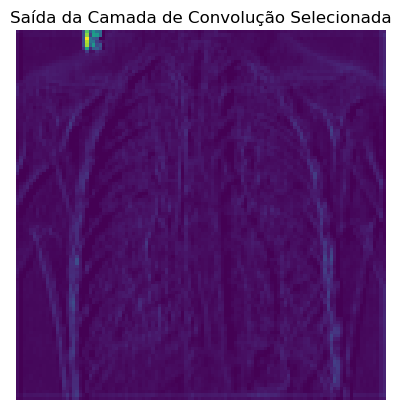

In [54]:
plt.imshow(saida_camada[0, :, :, 6], cmap='viridis')
plt.title('Saída da Camada de Convolução Selecionada')
plt.axis('off')